In [1]:
from pykrx import stock

1. **모바일게임(스마트폰)** : **엔씨소프트 036570** , **넷마블 251270** , **크래프톤 259960** 
2. **시스템(비메모리)반도체** : **삼성전자 005930 , SK하이닉스 000660** , **DB 하이텍 000990**
3. **자율주행차** : **현대차 005380** , **현대모비스 012330**, **HL 만도 204320**, **기아 000270**, **LG이노텍 011070**, **KT 030200** 
4. **2차전지(생산)** : **LG에너지솔루션 373220 , 삼성SDI 006400****, LG화학 051910, SK이노베이션096770**

In [3]:
stock_list = ['036570','251270','259960','005930','000660','000990','005380',
             '012330','204320','000270','011070','030200','373220','006400','051910','096770']

In [4]:
import time
import pandas as pd
stock_code = ['036570','251270','259960','005930','000660','000990','005380',
             '012330','204320','000270','011070','030200','373220','006400','051910','096770'] 
res = pd.DataFrame()
for ticker in stock_code :
    df = stock.get_market_ohlcv_by_date(fromdate="20210101", todate="20230605", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    res = pd.concat([res, df], axis=0)
    time.sleep(1)
res = res.reset_index()
res

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,종목명
0,2021-01-04,949000,985000,935000,978000,151790,144982145000,5.05,036570,엔씨소프트
1,2021-01-05,973000,993000,960000,985000,122865,119873116000,0.72,036570,엔씨소프트
2,2021-01-06,991000,997000,950000,953000,169260,163774564000,-3.25,036570,엔씨소프트
3,2021-01-07,962000,963000,939000,947000,118410,112449530000,-0.63,036570,엔씨소프트
4,2021-01-08,956000,1000000,949000,995000,198693,195752673235,5.07,036570,엔씨소프트
...,...,...,...,...,...,...,...,...,...,...
9162,2023-05-30,185500,193400,185100,191900,1034034,196734905100,4.98,096770,SK이노베이션
9163,2023-05-31,189800,192700,189100,189100,679946,129360107500,-1.46,096770,SK이노베이션
9164,2023-06-01,189400,194400,189300,194100,660725,127603060900,2.64,096770,SK이노베이션
9165,2023-06-02,194600,199200,192600,198000,708304,139226098600,2.01,096770,SK이노베이션


In [5]:
closeprice = res[['날짜','종가','등락률','종목코드','종목명']]

In [6]:
closeprice

,날짜,종가,등락률,종목코드,종목명
0,2021-01-04,978000,5.05,036570,엔씨소프트
1,2021-01-05,985000,0.72,036570,엔씨소프트
2,2021-01-06,953000,-3.25,036570,엔씨소프트
3,2021-01-07,947000,-0.63,036570,엔씨소프트
4,2021-01-08,995000,5.07,036570,엔씨소프트
...,...,...,...,...,...
9162,2023-05-30,191900,4.98,096770,SK이노베이션
9163,2023-05-31,189100,-1.46,096770,SK이노베이션
9164,2023-06-01,194100,2.64,096770,SK이노베이션
9165,2023-06-02,198000,2.01,096770,SK이노베이션


In [7]:
df_for_corr = pd.DataFrame()
for 종목명, group in closeprice.groupby('종목명'):
    종목명별_종가 = group[['등락률']].copy()
    종목명별_종가.columns = [종목명]
    종목명별_종가 = 종목명별_종가.set_index(group['날짜'])
    df_for_corr = pd.concat([df_for_corr, 종목명별_종가], axis=1)

# 결과 데이터프레임 출력
df_for_corr

,DB하이텍,HL만도,KT,LG에너지솔루션,LG이노텍,LG화학,SK이노베이션,SK하이닉스,기아,넷마블,삼성SDI,삼성전자,엔씨소프트,크래프톤,현대모비스,현대차
날짜,,,,,,,,,,,,,,,,
2021-01-04,0.20,6.63,-0.83,NaN,5.48,7.89,21.58,6.33,2.56,-0.38,6.85,2.47,5.05,NaN,12.330000,8.07
2021-01-05,-2.35,6.38,0.63,NaN,-2.08,0.45,5.63,3.57,-0.47,1.15,2.24,1.08,0.72,NaN,1.390000,0.96
2021-01-06,7.41,-1.35,0.21,NaN,-3.18,-0.34,5.33,0.38,-2.35,-2.26,-0.87,-2.03,-3.25,NaN,-2.580000,-3.10
2021-01-07,0.75,2.89,2.71,NaN,3.01,8.09,2.33,2.67,1.29,0.00,2.65,0.85,-0.63,NaN,7.410000,1.48
2021-01-08,1.67,14.33,-1.01,NaN,2.93,3.85,7.60,2.60,8.41,3.47,5.87,7.12,5.07,NaN,18.059999,19.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,0.81,0.42,2.24,0.35,6.75,-0.57,4.98,1.01,-2.06,-0.18,3.61,2.84,-3.00,2.05,-1.540000,-2.43
2023-05-31,-2.58,1.05,-1.41,3.28,-0.49,-1.28,-1.46,-1.54,0.35,-1.24,0.00,-1.24,-0.77,0.05,-0.220000,-0.25
2023-06-01,0.50,-2.28,-3.01,-2.50,-0.98,-0.87,2.64,1.57,-1.98,-1.07,-1.39,-0.70,0.00,0.16,-0.670000,-1.25


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 상관계수 계산
corr_matrix = df_for_corr.corr(method = 'pearson')

In [10]:
corr_matrix 

,DB하이텍,HL만도,KT,LG에너지솔루션,LG이노텍,LG화학,SK이노베이션,SK하이닉스,기아,넷마블,삼성SDI,삼성전자,엔씨소프트,크래프톤,현대모비스,현대차
DB하이텍,1.000000,0.231648,0.052379,0.145571,0.350871,0.162562,0.172670,0.389334,0.241720,0.199880,0.225393,0.442681,0.131871,0.214845,0.147242,0.229440
HL만도,0.231648,1.000000,0.097035,0.235912,0.278443,0.226470,0.336586,0.274724,0.593882,0.165060,0.291061,0.350432,0.162543,0.189574,0.636513,0.677772
KT,0.052379,0.097035,1.000000,-0.022935,0.098490,0.038650,0.099449,0.096994,0.090341,0.115305,0.109237,0.152392,0.087462,0.078032,0.081310,0.063386
LG에너지솔루션,0.145571,0.235912,-0.022935,1.000000,0.153909,0.463212,0.361167,0.227669,0.147415,0.163201,0.470095,0.236299,0.217690,0.209987,0.208762,0.214068
LG이노텍,0.350871,0.278443,0.098490,0.153909,1.000000,0.180590,0.258717,0.345322,0.259181,0.166292,0.338013,0.365332,0.236746,0.258713,0.225090,0.248352
LG화학,0.162562,0.226470,0.038650,0.463212,0.180590,1.000000,0.359199,0.266757,0.301594,0.188257,0.547587,0.322403,0.218618,0.248778,0.328259,0.316974
SK이노베이션,0.172670,0.336586,0.099449,0.361167,0.258717,0.359199,1.000000,0.281355,0.237135,0.155587,0.422096,0.285974,0.111831,0.193059,0.371741,0.303175
SK하이닉스,0.389334,0.274724,0.096994,0.227669,0.345322,0.266757,0.281355,1.000000,0.245427,0.160731,0.293633,0.685746,0.197273,0.283920,0.272241,0.327578
기아,0.241720,0.593882,0.090341,0.147415,0.259181,0.301594,0.237135,0.245427,1.000000,0.132351,0.291938,0.368577,0.088067,0.212624,0.603453,0.742781
넷마블,0.199880,0.165060,0.115305,0.163201,0.166292,0.188257,0.155587,0.160731,0.132351,1.000000,0.188500,0.229980,0.377238,0.302652,0.172607,0.157105


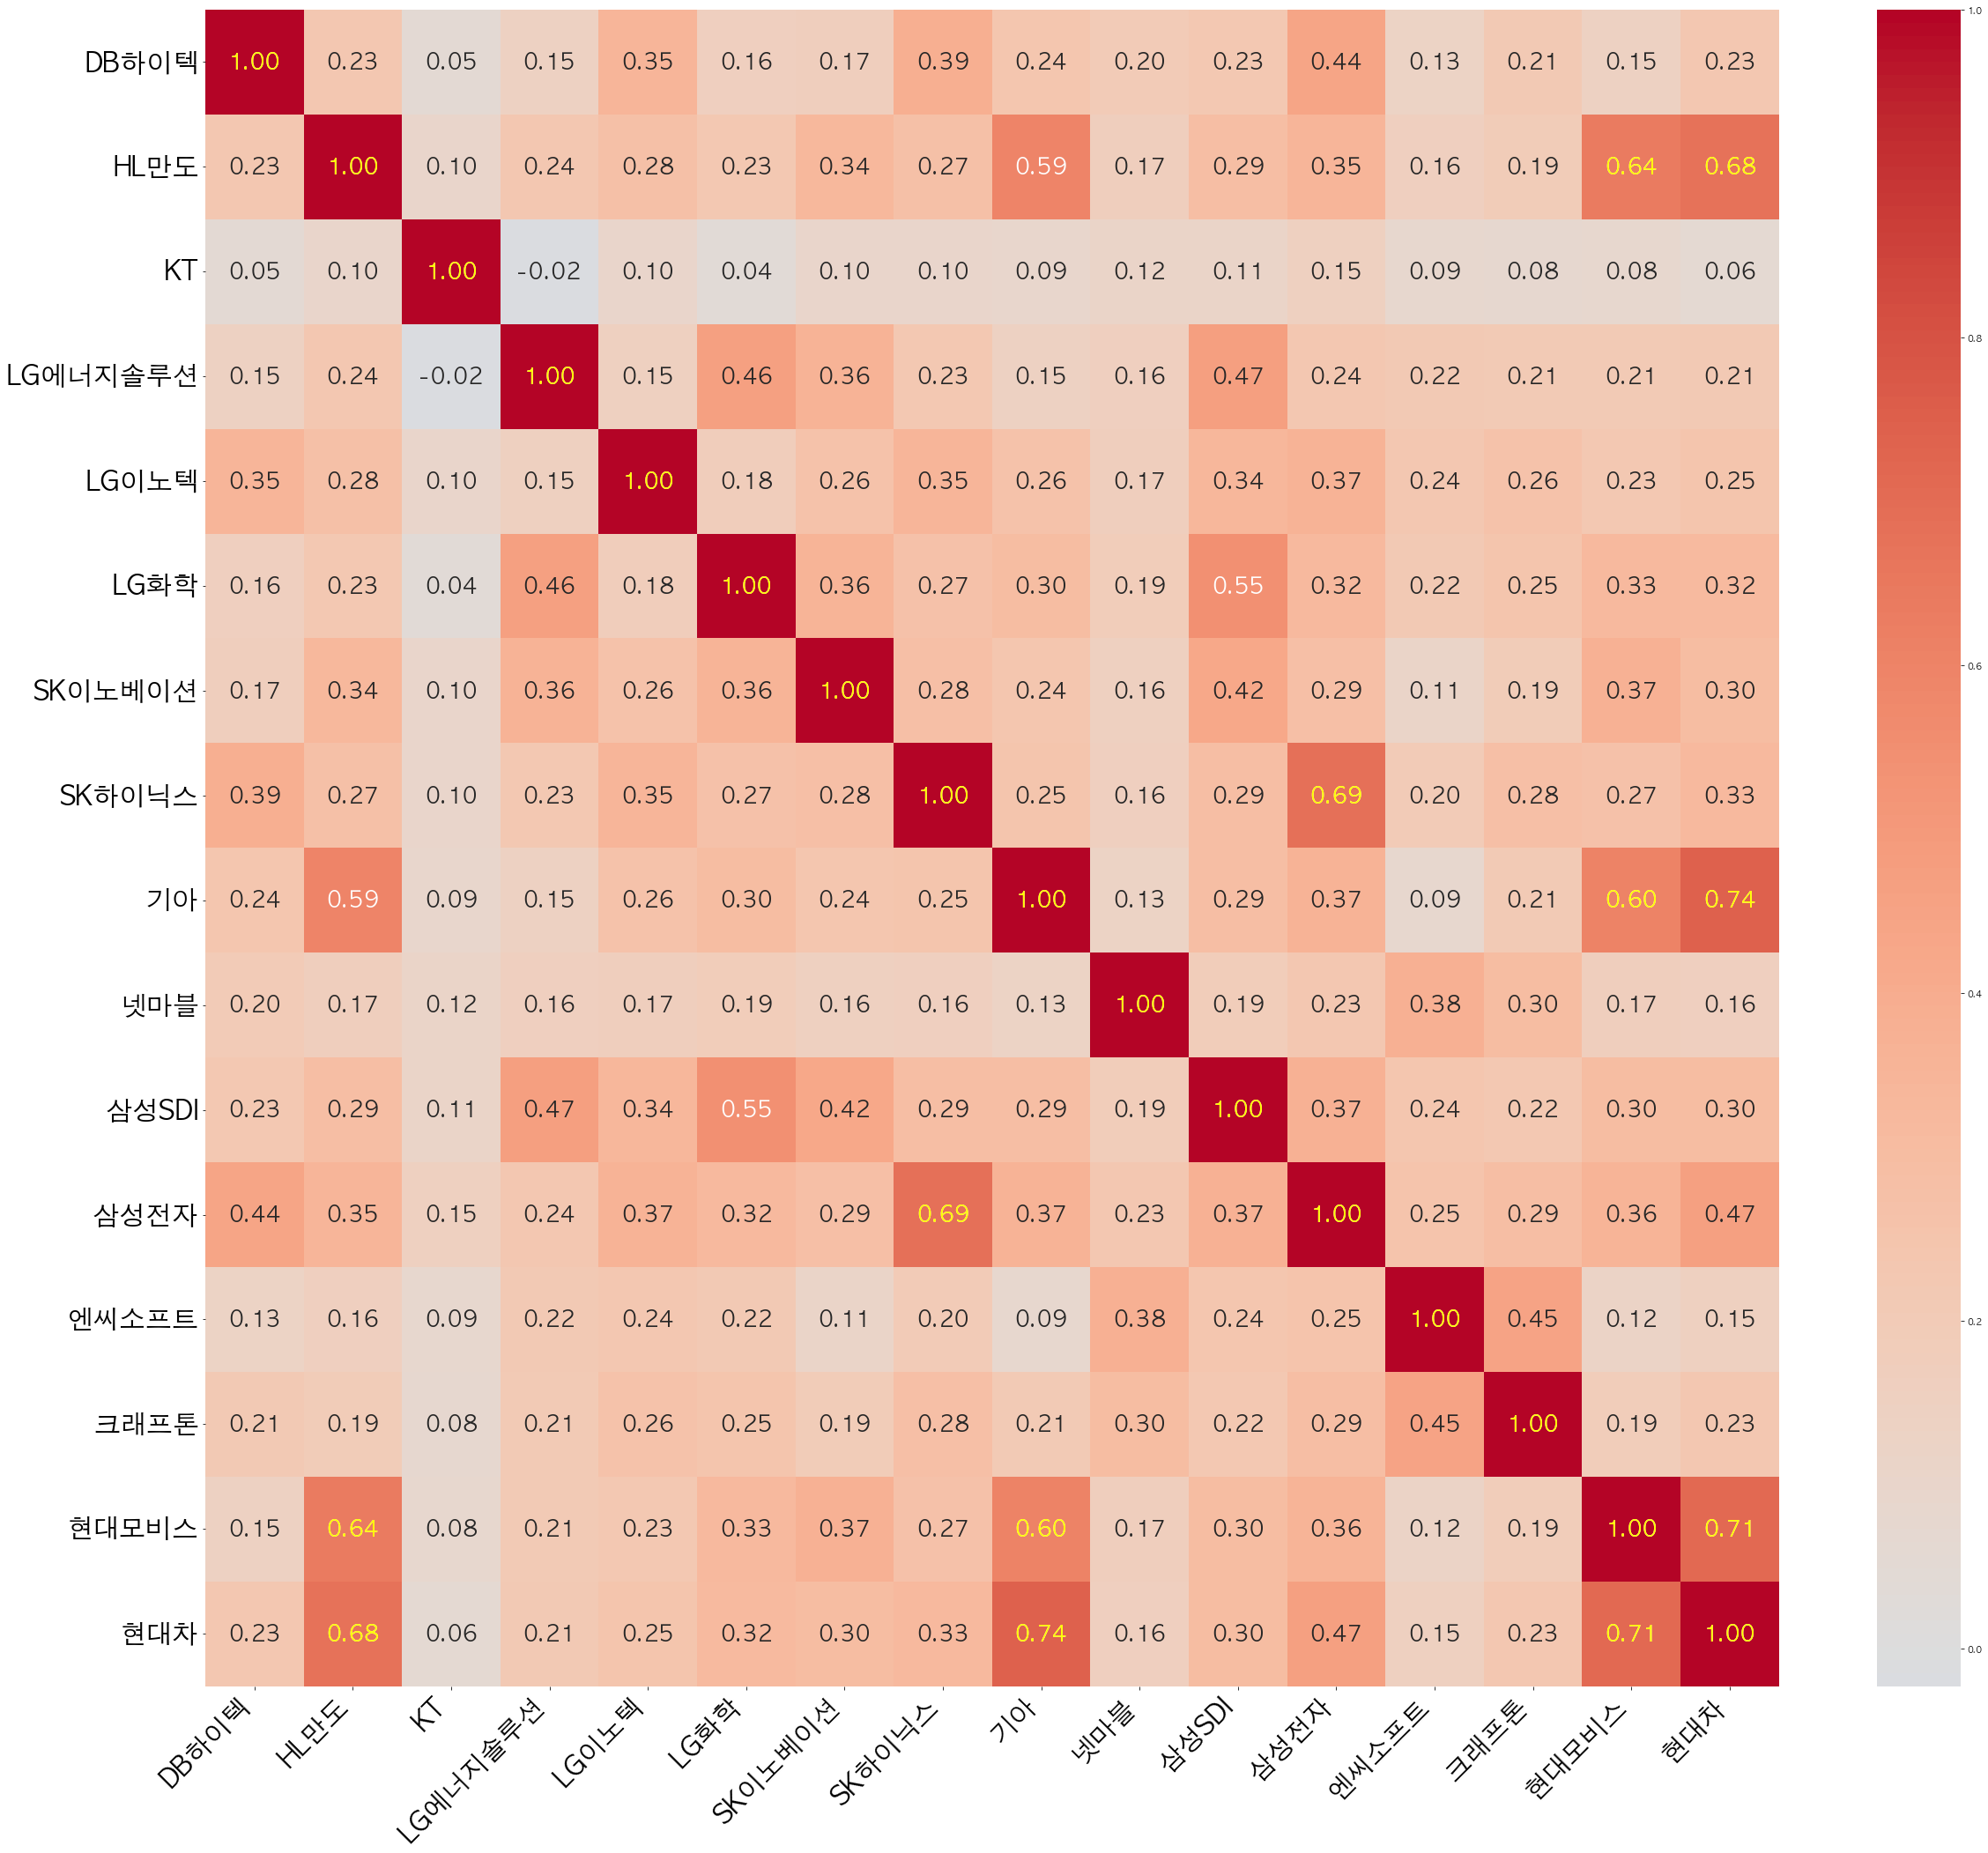

In [13]:
# 상관계수가 0.6을 초과하는 경우에만 진한 색상으로 표시하는 마스크 생성
# mask = np.triu(corr_matrix >= 0.6)

# 히트맵 크기 설정
plt.figure(figsize=(40, 35))

# 히트맵 그리기
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
           annot_kws={'fontsize': 25}, center=0)


# 상관계수가 0.6 이상인 부분 글씨를 노란색으로 설정
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.6:
            ax.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr_matrix.iloc[i, j]),
                    ha='center', va='center', color='yellow', fontsize=25)


# 주식 이름의 글씨 기울이기
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=30)


# 그래프 출력
plt.show()

# 그래프 출력 및 이미지로 저장
fig = ax.get_figure()
fig.savefig('heatmap.png', dpi=300)


In [12]:
# 그래프 출력 및 이미지로 저장
plt.savefig('heatmap.png')

<Figure size 432x288 with 0 Axes>